# things that need to be changed to code
- days --> need to be skipped on axes 
- grouping --> after changing to 3 different niacin concentrations, this needs to be represented in (different) graph
                    --> started with this but there's errors I can't resolve

Getting started: Loading packages and reading in the data

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import trompy as tp
from scipy import stats

In [2]:
# read in data
PATH_TO_WORKBOOK = Path("../data/")
EXCEL_WORKBOOK = "measurements_b3_1.xlsx"
rows, header = tp.metafilereader(PATH_TO_WORKBOOK / EXCEL_WORKBOOK, sheetname="metafile_niacin")


# how about a google drive but that we save a csv file for every day

# Showing the data set (such as columns) and creating a new variable for the four groups

In [3]:
def get_value(row):
    if row['sex'] == 'female' and row['group'] == 'control':
        return 0
    elif row['sex'] == 'female' and row['group'] == 'experimental':
        return 1
    elif row['sex'] == 'male' and row['group'] == 'control':
        return 2
    elif row['sex'] == 'male' and row['group'] == 'experimental':
        return 3
    else:
        return -1

def tweak_df(df):
    
    return (df
            # .query("bodyweight != ''")
            .query("bodyweight.notna()", engine="python")
            .astype({"sex": "category",
                     "group": "category",
                     "diet": "category",
                     "bodyweight": float,
                     "food_yesterday": float,
                     "food_intake": float,
                     "water_intake": float
                     }
                    )
             .assign(groupn = lambda df_: df_.apply(get_value, axis=1))
            )
    
df = tweak_df(pd.DataFrame(rows, columns=header))

In [4]:
df

,animal_id,sex,group,diet,date,niacin,bodyweight,food_yesterday,food_today,food_intake,water_yesterday,water_today,water_intake,groupn
0,B3101,male,control,control,2024-02-12,0.0,21.8,-1.0,60.7,-1.00,-1.0,50.9,-1.00,2
1,B3102,male,control,control,2024-02-12,0.0,24.7,-1.0,56,-1.00,-1.0,50.4,-1.00,2
2,B3103,male,experimental,control,2024-02-12,0.0,24.9,-1.0,54.5,-1.00,-1.0,50.5,-1.00,3
3,B3104,male,experimental,control,2024-02-12,0.0,24.9,-1.0,54.5,-1.00,-1.0,50.5,-1.00,3
4,B3105,male,control,control,2024-02-12,0.0,25.4,-1.0,56.3,-1.00,-1.0,50.9,-1.00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339,B3128,female,experimental,experimental,2024-04-05,0.0,23.6,41.3,34.5,3.40,44.7,35.4,4.65,1
1340,B3129,female,control,control,2024-04-05,0.0,23.3,39.2,32.2,3.50,46.4,38.7,3.85,0
1341,B3130,female,control,control,2024-04-05,0.0,24.5,40.7,34,3.35,44.2,36.9,3.65,0
1342,B3131,female,experimental,experimental,2024-04-05,0.0,23.5,38.3,31.3,3.50,44.2,38.1,3.05,1


In [5]:
df.dtypes

animal_id            object
sex                category
group              category
diet               category
date                 object
niacin              float64
bodyweight          float64
food_yesterday      float64
food_today           object
food_intake         float64
water_yesterday     float64
water_today          object
water_intake        float64
groupn                int64
dtype: object

In [6]:
df.columns

Index(['animal_id', 'sex', 'group', 'diet', 'date', 'niacin', 'bodyweight',
       'food_yesterday', 'food_today', 'food_intake', 'water_yesterday',
       'water_today', 'water_intake', 'groupn'],
      dtype='object')

In [7]:
df.animal_id.unique()
df.date.unique()

array(['2024-02-12', '2024-02-13', '2024-02-14', '2024-02-15',
       '2024-02-16', '2024-02-17', '2024-02-18', '2024-02-19',
       '2024-02-20', '2024-02-21', '2024-02-22', '2024-02-23',
       '2024-02-24', '2024-02-25', '2024-02-26', '2024-02-27',
       '2024-02-28', '2024-02-29', '2024-03-01', '2024-03-02',
       '2024-03-03', '2024-03-04', '2024-03-05', '2024-03-06',
       '2024-03-07', '2024-03-08', '2024-03-09', '2024-03-10',
       '2024-03-11', '2024-03-12', '2024-03-13', '2024-03-14',
       '2024-03-15', '2024-03-18', '2024-03-20', '2024-03-22',
       '2024-03-25', '2024-03-27', '2024-03-29', '2024-04-01',
       '2024-04-03', '2024-04-05'], dtype=object)

In [8]:
df.groupby(["sex", "group", "date"]).mean(numeric_only=True).reset_index()

,sex,group,date,niacin,bodyweight,food_yesterday,food_intake,water_yesterday,water_intake,groupn
0,female,control,2024-02-12,0.0,20.4125,-1.0000,-1.000000,-1.0000,-1.000000,0.0
1,female,control,2024-02-13,0.0,19.9375,77.4500,2.887500,51.5000,9.012500,0.0
2,female,control,2024-02-14,0.0,20.0625,74.5625,2.937500,51.2875,3.062500,0.0
3,female,control,2024-02-15,0.0,20.0875,71.6250,2.987500,51.5250,3.000000,0.0
4,female,control,2024-02-16,0.0,20.2125,72.7875,3.362500,51.7500,3.150000,0.0
...,...,...,...,...,...,...,...,...,...,...
163,male,experimental,2024-03-27,1.5,28.7500,52.0000,2.906250,44.7000,2.625000,3.0
164,male,experimental,2024-03-29,1.5,29.2500,46.1875,2.956250,51.7750,2.962500,3.0
165,male,experimental,2024-04-01,1.5,29.6500,45.6875,2.795833,45.8500,2.491667,3.0
166,male,experimental,2024-04-03,1.5,29.5875,37.3000,2.900000,44.6125,2.687500,3.0


# Plotting the body mass, food intake, and water intake for the four groups

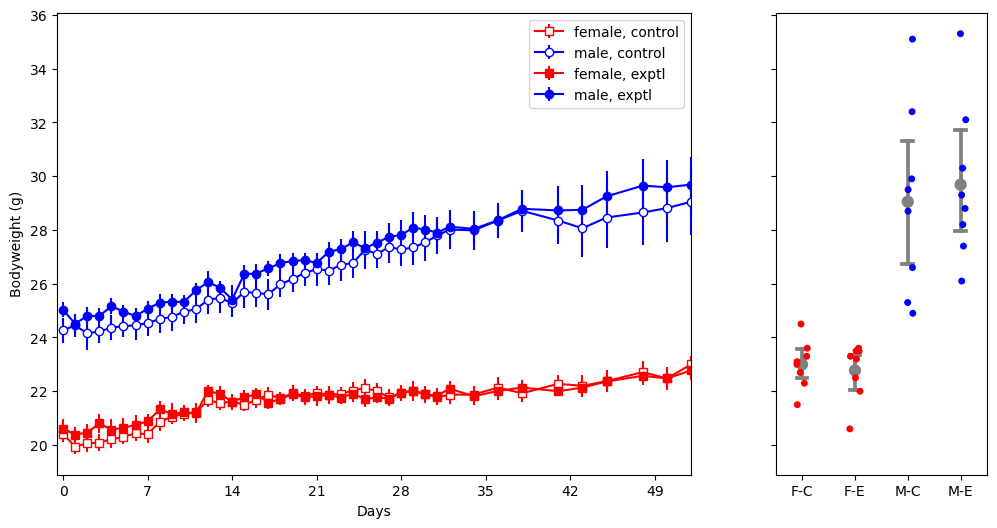

In [9]:
# Find mean and SEM of all data
mean = df.groupby(["sex", "group", "date"]).mean(numeric_only=True).reset_index()
sem = df.groupby(["sex", "group", "date"]).sem(numeric_only=True).reset_index()

# Generate figure with two subplots
f, ax = plt.subplots(ncols=2, figsize=(12, 6), sharey=True,
                     gridspec_kw={"width_ratios": [3, 1]},)

# Set x values based on number of days
x = np.arange(int(len(mean.date) / 4))
x1 = list(np.arange(0,33,1)) 
x2 = [34,36,38,41,43,45,48,50,52]
x = x1 + x2
y = mean.query("sex == 'female' and group == 'control'").bodyweight

# Plot data for each group in first subplot
ax[0].errorbar(x,
               mean.query("sex == 'female' and group == 'control'").bodyweight,
               yerr=sem.query("sex == 'female' and group == 'control'").bodyweight,
               marker="s", markerfacecolor="white", color="red",
               label="female, control"
                )

ax[0].errorbar(x,
               mean.query("sex == 'male' and group == 'control'").bodyweight,
               yerr=sem.query("sex == 'male' and group == 'control'").bodyweight,
               marker="o", markerfacecolor="white", color="blue",
               label="male, control")

ax[0].errorbar(x,
               mean.query("sex == 'female' and group == 'experimental'").bodyweight,
               yerr=sem.query("sex == 'female' and group == 'experimental'").bodyweight,
               marker="s", markerfacecolor="red", color="red",
               label="female, exptl")

ax[0].errorbar(x,
               mean.query("sex == 'male' and group == 'experimental'").bodyweight,
               yerr=sem.query("sex == 'male' and group == 'experimental'").bodyweight,
               marker="o", markerfacecolor="blue", color="blue",
               label="male, exptl")

# Set x axis limits and ticks
ax[0].set_xlim([-0.5,52])
ax[0].set_xticks([0,7,14,21,28,35,42,49])

# Add labels
ax[0].set_ylabel("Bodyweight (g)")
ax[0].set_xlabel("Days")

ax[0].legend()

# Plot today's data in second subplot
today = df.date.max()
today_df = df.query("date == @today")

palette = ["red", "red", "blue", "blue"]

sns.stripplot(data=today_df, x="groupn", y="bodyweight", hue="groupn", palette=palette, ax=ax[1])
sns.pointplot(data=today_df, x='groupn', y='bodyweight', capsize=.2, color="grey", markers='o', join=False, ax=ax[1])

ax[1].set_xticklabels(["F-C", "F-E", "M-C", "M-E"])
ax[1].set_xlabel("")
ax[1].set_ylabel("Bodyweight (g)")
ax[1].legend().remove()

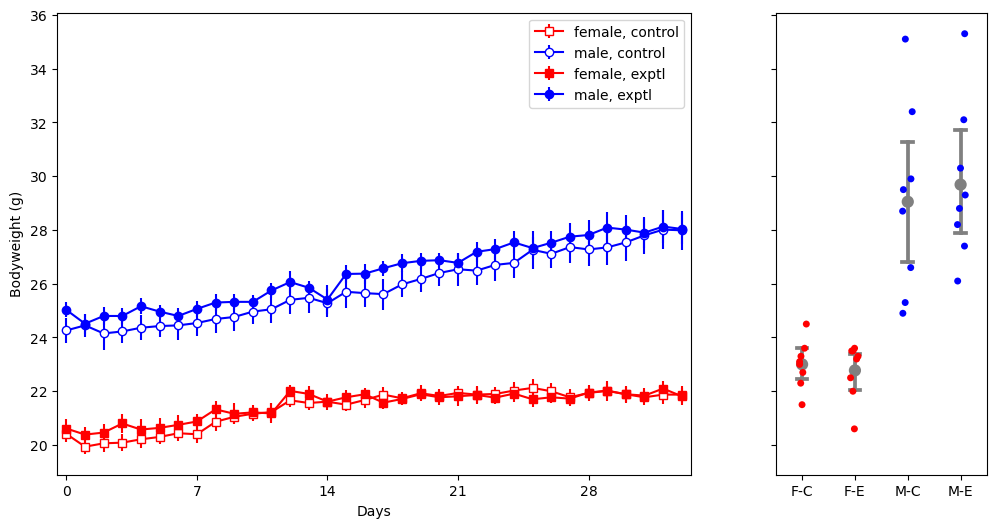

In [10]:
#now for only the first 34 days
# Find mean and SEM of all data
mean = df.groupby(["sex", "group", "date"]).mean(numeric_only=True).reset_index()
sem = df.groupby(["sex", "group", "date"]).sem(numeric_only=True).reset_index()

# Generate figure with two subplots
f, ax = plt.subplots(ncols=2, figsize=(12, 6), sharey=True, gridspec_kw={"width_ratios": [3, 1]})

# Set x values based on number of days
x = np.arange(34)
y = mean.query("sex == 'female' and group == 'control'").bodyweight[:34]

# Plot data for each group in first subplot
ax[0].errorbar(x,
               mean.query("sex == 'female' and group == 'control'").bodyweight[:34],
               yerr=sem.query("sex == 'female' and group == 'control'").bodyweight[:34],
               marker="s", markerfacecolor="white", color="red",
               label="female, control")

ax[0].errorbar(x,
               mean.query("sex == 'male' and group == 'control'").bodyweight[:34],
               yerr=sem.query("sex == 'male' and group == 'control'").bodyweight[:34],
               marker="o", markerfacecolor="white", color="blue",
               label="male, control")

ax[0].errorbar(x,
               mean.query("sex == 'female' and group == 'experimental'").bodyweight[:34],
               yerr=sem.query("sex == 'female' and group == 'experimental'").bodyweight[:34],
               marker="s", markerfacecolor="red", color="red",
               label="female, exptl")

ax[0].errorbar(x,
               mean.query("sex == 'male' and group == 'experimental'").bodyweight[:34],
               yerr=sem.query("sex == 'male' and group == 'experimental'").bodyweight[:34],
               marker="o", markerfacecolor="blue", color="blue",
               label="male, exptl")

# Set x axis limits and ticks
ax[0].set_xlim([-0.5, 33.5])
ax[0].set_xticks(np.arange(0, 35, 7))

# Add labels
ax[0].set_ylabel("Bodyweight (g)")
ax[0].set_xlabel("Days")
ax[0].legend()

# Plot today's data in second subplot
today = df.date.max()
today_df = df.query("date == @today")

palette = ["red", "red", "blue", "blue"]

sns.stripplot(data=today_df, x="groupn", y="bodyweight", hue="groupn", palette=palette, ax=ax[1])
sns.pointplot(data=today_df, x='groupn', y='bodyweight', capsize=.2, color="grey", markers='o', join=False, ax=ax[1])

ax[1].set_xticklabels(["F-C", "F-E", "M-C", "M-E"])
ax[1].set_xlabel("")
ax[1].set_ylabel("Bodyweight (g)")
ax[1].legend().remove()

f.savefig("..//results//bodyweight_niacin1_until_day_34.png")

In [11]:
today_df

,animal_id,sex,group,diet,date,niacin,bodyweight,food_yesterday,food_today,food_intake,water_yesterday,water_today,water_intake,groupn
1312,B3101,male,control,control,2024-04-05,0.0,25.3,39.7,33.7,3.00,51.7,46.4,2.65,2
1313,B3102,male,control,control,2024-04-05,0.0,24.9,42.8,37.6,2.60,52.0,46.6,2.70,2
1314,B3103,male,experimental,experimental,2024-04-05,0.0,26.1,33.4,28.5,2.45,52.0,47.1,2.45,3
1315,B3104,male,experimental,experimental,2024-04-05,0.0,35.3,41.8,35.8,3.00,50.2,46.1,2.05,3
1316,B3105,male,control,control,2024-04-05,0.0,32.4,41.6,36.2,2.70,51.8,47.6,2.10,2
1317,B3106,male,control,control,2024-04-05,0.0,35.1,47.0,39.7,3.65,51.2,45.7,2.75,2
1318,B3107,male,experimental,experimental,2024-04-05,1.0,30.3,28.9,24.3,2.30,51.5,47.8,1.85,3
1319,B3108,male,experimental,experimental,2024-04-05,1.0,29.3,30.4,24.5,2.95,51.9,47.7,2.10,3
1320,B3109,male,control,control,2024-04-05,0.0,28.7,37.3,31.8,2.75,52.0,47.9,2.05,2
1321,B3110,male,control,control,2024-04-05,0.0,29.9,45.2,39.6,2.80,52.1,47.8,2.15,2


In [12]:
today

'2024-04-05'

In [13]:
df.head()

,animal_id,sex,group,diet,date,niacin,bodyweight,food_yesterday,food_today,food_intake,water_yesterday,water_today,water_intake,groupn
0,B3101,male,control,control,2024-02-12,0.0,21.8,-1.0,60.7,-1.0,-1.0,50.9,-1.0,2
1,B3102,male,control,control,2024-02-12,0.0,24.7,-1.0,56,-1.0,-1.0,50.4,-1.0,2
2,B3103,male,experimental,control,2024-02-12,0.0,24.9,-1.0,54.5,-1.0,-1.0,50.5,-1.0,3
3,B3104,male,experimental,control,2024-02-12,0.0,24.9,-1.0,54.5,-1.0,-1.0,50.5,-1.0,3
4,B3105,male,control,control,2024-02-12,0.0,25.4,-1.0,56.3,-1.0,-1.0,50.9,-1.0,2


In [14]:
# try to skip days
# no idea how, tried for very long but nothing worked (CHATGPT didn't help at all)

In [15]:
# Food intake figure

# Clean up df

def replace_outliers(df, column):
    
    values=[]
    for idx, row in df.iterrows():
        if row[column] < 1:
            values.append(np.nan)
        elif row[column] > np.mean(df[column]) * 2:
            values.append(np.nan)
        else:
            values.append(row[column])
    
    print("the number of outliers being replaced for", column, "is", np.sum(np.isnan(values)))
    df[column] = values
    mean_by_animal = df.groupby(["animal_id"]).mean(numeric_only=True).reset_index()
            
    values=[]
    for idx, row in df.iterrows():
        if np.isnan(row[column]):
            values.append(mean_by_animal.query('animal_id == @row.animal_id')[column].values[0])
        else:
            values.append(row[column])
    
    return values
    
def remove_and_clean(df):
    """Removes unecessary rows and cleans data to get rid of erroneous values.

    Args:
        df (Pandas dataframe): Contains data from niacin experiment

    Returns:
        Dataframe: Cleaned dataframe
    """
    return (df
            .query("food_yesterday != -1.0")
            
            .assign(food_intake = lambda df_: replace_outliers(df_, "food_intake"))
            .assign(water_intake = lambda df_: replace_outliers(df_, "water_intake"))
    )

df_food_water = remove_and_clean(df)

the number of outliers being replaced for food_intake is 7
the number of outliers being replaced for water_intake is 5


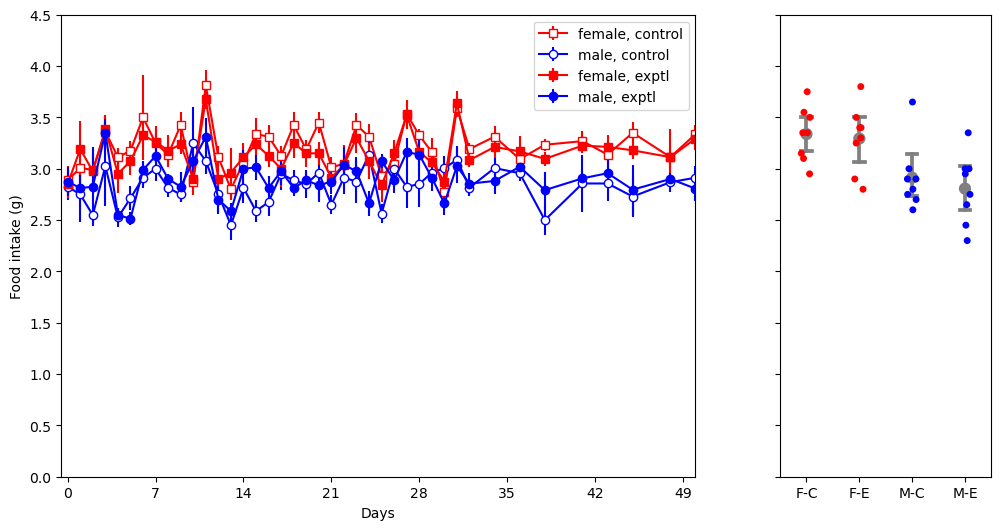

In [16]:
# Find mean and SEM of all data
mean_fw = df_food_water.groupby(["sex", "group", "date"]).mean(numeric_only=True).reset_index()
sem_fw = df_food_water.groupby(["sex", "group", "date"]).sem(numeric_only=True).reset_index()

# Generate figure with two subplots
f, ax = plt.subplots(ncols=2, figsize=(12, 6), sharey=True,
                     gridspec_kw={"width_ratios": [3, 1]},)

# Set x values based on number of days
x = np.arange(int(len(mean.date) / 4))
x1 = list(np.arange(0,33,1)) 
x2 = [34,36,38,41,43,45,48,50]
x = x1 + x2
y = mean.query("sex == 'female' and group == 'control'").bodyweight

# Plot data for each group in first subplot
ax[0].errorbar(x,
               mean_fw.query("sex == 'female' and group == 'control'").food_intake,
               yerr=sem_fw.query("sex == 'female' and group == 'control'").food_intake,
               marker="s", markerfacecolor="white", color="red",
               label="female, control"
                )

ax[0].errorbar(x,
               mean_fw.query("sex == 'male' and group == 'control'").food_intake,
               yerr=sem_fw.query("sex == 'male' and group == 'control'").food_intake,
               marker="o", markerfacecolor="white", color="blue",
               label="male, control")

ax[0].errorbar(x,
               mean_fw.query("sex == 'female' and group == 'experimental'").food_intake,
               yerr=sem_fw.query("sex == 'female' and group == 'experimental'").food_intake,
               marker="s", markerfacecolor="red", color="red",
               label="female, exptl")

ax[0].errorbar(x,
               mean_fw.query("sex == 'male' and group == 'experimental'").food_intake,
               yerr=sem_fw.query("sex == 'male' and group == 'experimental'").food_intake,
               marker="o", markerfacecolor="blue", color="blue",
               label="male, exptl")

# Set x axis limits and ticks
ax[0].set_xlim([-0.5,50])
ax[0].set_xticks([0,7,14,21,28,35,42,49])

ax[0].set_ylim([0,4.5])

# Add labels
ax[0].set_ylabel("Food intake (g)")
ax[0].set_xlabel("Days")

ax[0].legend()

# Plot today's data in second subplot
today = df.date.max()
today_df = df.query("date == @today")

palette = ["red", "red", "blue", "blue"]

sns.stripplot(data=today_df, x="groupn", y="food_intake", hue="groupn", palette=palette, ax=ax[1])
sns.pointplot(data=today_df, x='groupn', y='food_intake', capsize=.2, color="grey", markers='o', join=False, ax=ax[1])

ax[1].set_xticklabels(["F-C", "F-E", "M-C", "M-E"])
ax[1].set_xlabel("")
ax[1].set_ylabel("Food intake (g)")
ax[1].legend().remove()


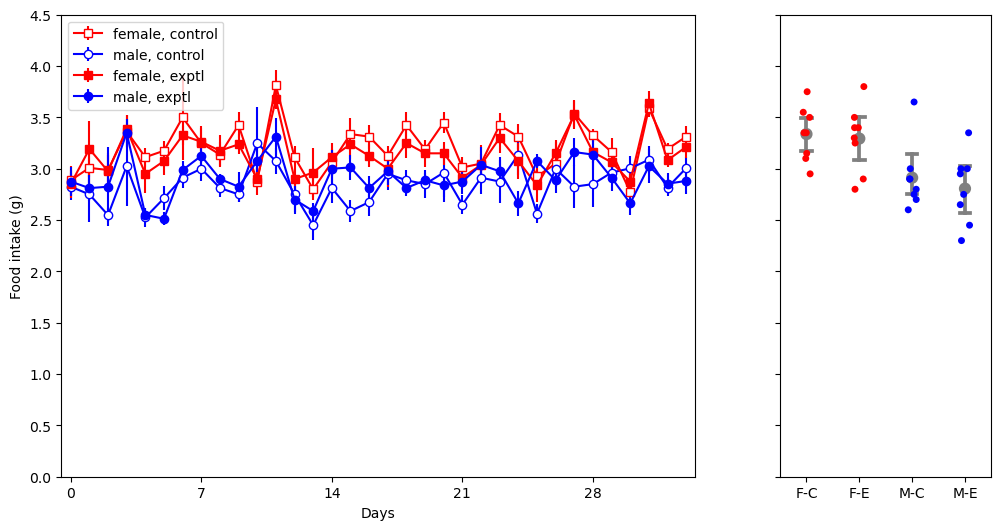

In [17]:
# Find mean and SEM of all data
mean_fw = df_food_water.groupby(["sex", "group", "date"]).mean(numeric_only=True).reset_index()
sem_fw = df_food_water.groupby(["sex", "group", "date"]).sem(numeric_only=True).reset_index()

# Generate figure with two subplots
f, ax = plt.subplots(ncols=2, figsize=(12, 6), sharey=True, gridspec_kw={"width_ratios": [3, 1]})

# Set x values based on number of days
x = np.arange(34)
y_female_control = mean_fw.query("sex == 'female' and group == 'control'").food_intake[:34]
y_male_control = mean_fw.query("sex == 'male' and group == 'control'").food_intake[:34]
y_female_experimental = mean_fw.query("sex == 'female' and group == 'experimental'").food_intake[:34]
y_male_experimental = mean_fw.query("sex == 'male' and group == 'experimental'").food_intake[:34]

# Plot data for each group in first subplot
ax[0].errorbar(x, y_female_control,
               yerr=sem_fw.query("sex == 'female' and group == 'control'").food_intake[:34],
               marker="s", markerfacecolor="white", color="red",
               label="female, control")

ax[0].errorbar(x, y_male_control,
               yerr=sem_fw.query("sex == 'male' and group == 'control'").food_intake[:34],
               marker="o", markerfacecolor="white", color="blue",
               label="male, control")

ax[0].errorbar(x, y_female_experimental,
               yerr=sem_fw.query("sex == 'female' and group == 'experimental'").food_intake[:34],
               marker="s", markerfacecolor="red", color="red",
               label="female, exptl")

ax[0].errorbar(x, y_male_experimental,
               yerr=sem_fw.query("sex == 'male' and group == 'experimental'").food_intake[:34],
               marker="o", markerfacecolor="blue", color="blue",
               label="male, exptl")

# Set x axis limits and ticks
ax[0].set_xlim([-0.5, 33.5])
ax[0].set_xticks(np.arange(0, 34, 7))

ax[0].set_ylim([0, 4.5])

# Add labels
ax[0].set_ylabel("Food intake (g)")
ax[0].set_xlabel("Days")
ax[0].legend()

# Plot today's data in second subplot
today = df_food_water.date.max()
today_df = df_food_water.query("date == @today")

palette = ["red", "red", "blue", "blue"]

sns.stripplot(data=today_df, x="groupn", y="food_intake", hue="groupn", palette=palette, ax=ax[1])
sns.pointplot(data=today_df, x='groupn', y='food_intake', capsize=.2, color="grey", markers='o', join=False, ax=ax[1])

ax[1].set_xticklabels(["F-C", "F-E", "M-C", "M-E"])
ax[1].set_xlabel("")
ax[1].set_ylabel("Food intake (g)")
ax[1].legend().remove()

f.savefig("../results/food_intake_niacin1_until_day_34.png")

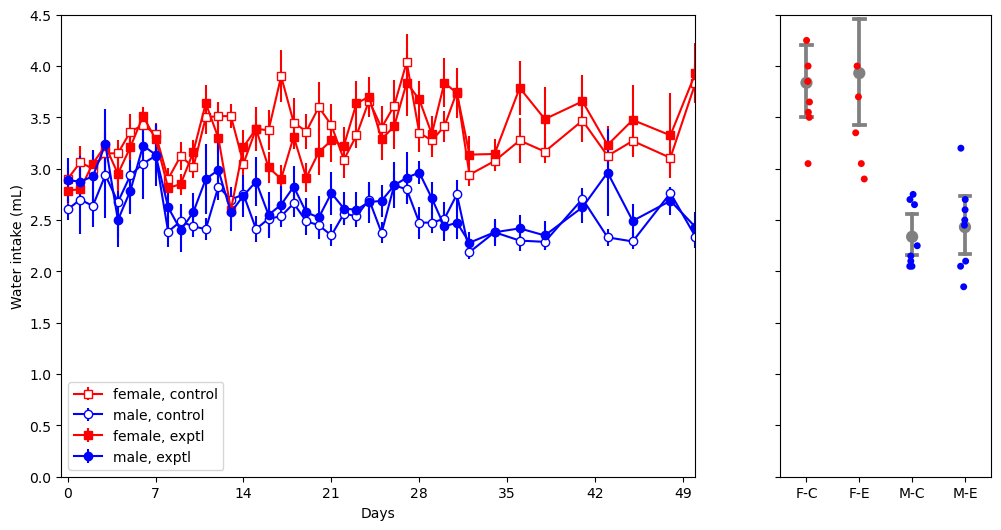

In [18]:
# Find mean and SEM of all data
mean_fw = df_food_water.groupby(["sex", "group", "date"]).mean(numeric_only=True).reset_index()
sem_fw = df_food_water.groupby(["sex", "group", "date"]).sem(numeric_only=True).reset_index()

# Generate figure with two subplots
f, ax = plt.subplots(ncols=2, figsize=(12, 6), sharey=True,
                     gridspec_kw={"width_ratios": [3, 1]},)

# Set x values based on number of days
x = np.arange(int(len(mean.date) / 4))
x1 = list(np.arange(0,33,1)) 
x2 = [34,36,38,41,43,45,48,50]
x = x1 + x2
y = mean.query("sex == 'female' and group == 'control'").water_intake

# Plot data for each group in first subplot
ax[0].errorbar(x,
               mean_fw.query("sex == 'female' and group == 'control'").water_intake,
               yerr=sem_fw.query("sex == 'female' and group == 'control'").water_intake,
               marker="s", markerfacecolor="white", color="red",
               label="female, control"
                )

ax[0].errorbar(x,
               mean_fw.query("sex == 'male' and group == 'control'").water_intake,
               yerr=sem_fw.query("sex == 'male' and group == 'control'").water_intake,
               marker="o", markerfacecolor="white", color="blue",
               label="male, control")

ax[0].errorbar(x,
               mean_fw.query("sex == 'female' and group == 'experimental'").water_intake,
               yerr=sem_fw.query("sex == 'female' and group == 'experimental'").water_intake,
               marker="s", markerfacecolor="red", color="red",
               label="female, exptl")

ax[0].errorbar(x,
               mean_fw.query("sex == 'male' and group == 'experimental'").water_intake,
               yerr=sem_fw.query("sex == 'male' and group == 'experimental'").water_intake,
               marker="o", markerfacecolor="blue", color="blue",
               label="male, exptl")

# Set x axis limits and ticks
ax[0].set_xlim([-0.5,50])
ax[0].set_xticks([0,7,14,21,28,35,42,49])

ax[0].set_ylim([0,4.5])

# Add labels
ax[0].set_ylabel("Water intake (mL)")
ax[0].set_xlabel("Days")

ax[0].legend()

# Plot today's data in second subplot
today = df.date.max()
today_df = df.query("date == @today")

palette = ["red", "red", "blue", "blue"]

sns.stripplot(data=today_df, x="groupn", y="water_intake", hue="groupn", palette=palette, ax=ax[1])
sns.pointplot(data=today_df, x='groupn', y='water_intake', capsize=.2, color="grey", markers='o', join=False, ax=ax[1])

ax[1].set_xticklabels(["F-C", "F-E", "M-C", "M-E"])
ax[1].set_xlabel("")
ax[1].set_ylabel("Water intake (mL)")
ax[1].legend().remove()


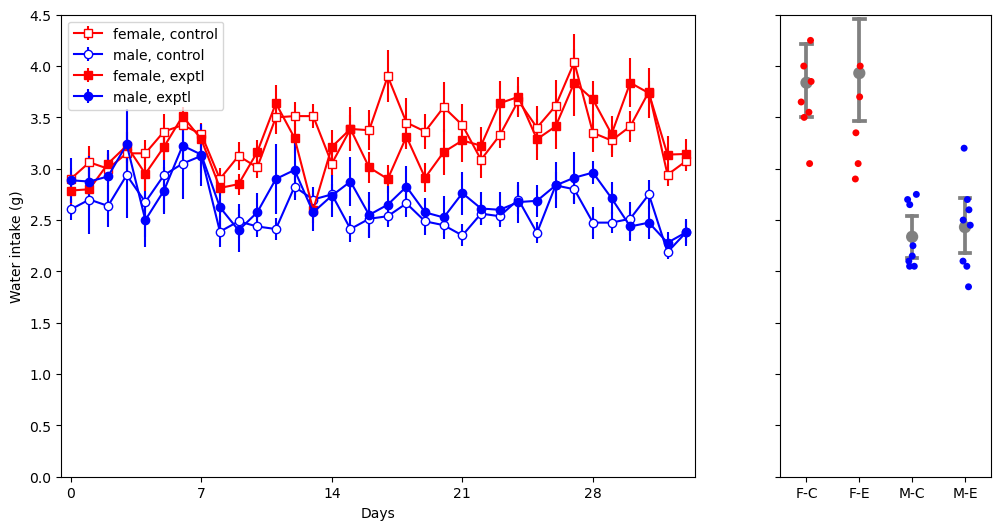

In [19]:
#now of only the first 34 days (before the split into groups)
# Find mean and SEM of all data
mean_fw = df_food_water.groupby(["sex", "group", "date"]).mean(numeric_only=True).reset_index()
sem_fw = df_food_water.groupby(["sex", "group", "date"]).sem(numeric_only=True).reset_index()

# Generate figure with two subplots
f, ax = plt.subplots(ncols=2, figsize=(12, 6), sharey=True, gridspec_kw={"width_ratios": [3, 1]})

# Set x values based on number of days
x = np.arange(34)
y_female_control = mean_fw.query("sex == 'female' and group == 'control'").water_intake[:34]
y_male_control = mean_fw.query("sex == 'male' and group == 'control'").water_intake[:34]
y_female_experimental = mean_fw.query("sex == 'female' and group == 'experimental'").water_intake[:34]
y_male_experimental = mean_fw.query("sex == 'male' and group == 'experimental'").water_intake[:34]

# Plot data for each group in first subplot
ax[0].errorbar(x, y_female_control,
               yerr=sem_fw.query("sex == 'female' and group == 'control'").water_intake[:34],
               marker="s", markerfacecolor="white", color="red",
               label="female, control")

ax[0].errorbar(x, y_male_control,
               yerr=sem_fw.query("sex == 'male' and group == 'control'").water_intake[:34],
               marker="o", markerfacecolor="white", color="blue",
               label="male, control")

ax[0].errorbar(x, y_female_experimental,
               yerr=sem_fw.query("sex == 'female' and group == 'experimental'").water_intake[:34],
               marker="s", markerfacecolor="red", color="red",
               label="female, exptl")

ax[0].errorbar(x, y_male_experimental,
               yerr=sem_fw.query("sex == 'male' and group == 'experimental'").water_intake[:34],
               marker="o", markerfacecolor="blue", color="blue",
               label="male, exptl")

# Set x axis limits and ticks
ax[0].set_xlim([-0.5, 33.5])
ax[0].set_xticks(np.arange(0, 34, 7))

ax[0].set_ylim([0, 4.5])

# Add labels
ax[0].set_ylabel("Water intake (g)")
ax[0].set_xlabel("Days")
ax[0].legend()

# Plot today's data in second subplot
today = df_food_water.date.max()
today_df = df_food_water.query("date == @today")

palette = ["red", "red", "blue", "blue"]

sns.stripplot(data=today_df, x="groupn", y="water_intake", hue="groupn", palette=palette, ax=ax[1])
sns.pointplot(data=today_df, x='groupn', y='water_intake', capsize=.2, color="grey", markers='o', join=False, ax=ax[1])

ax[1].set_xticklabels(["F-C", "F-E", "M-C", "M-E"])
ax[1].set_xlabel("")
ax[1].set_ylabel("Water intake (g)")
ax[1].legend().remove()

f.savefig("../results/water_intake_niacin1_until_day_34.png")

In [20]:
df.query("date == '2024-02-13'")

,animal_id,sex,group,diet,date,niacin,bodyweight,food_yesterday,food_today,food_intake,water_yesterday,water_today,water_intake,groupn
32,B3101,male,control,control,2024-02-13,0.0,22.4,60.7,57.2,3.5,50.9,48.3,2.6,2
33,B3102,male,control,control,2024-02-13,0.0,24.5,56.0,53.2,2.8,50.4,47.7,2.7,2
34,B3103,male,experimental,control,2024-02-13,0.0,23.2,54.5,50.9,3.6,50.5,48,2.5,3
35,B3104,male,experimental,control,2024-02-13,0.0,24.9,54.5,51.7,2.8,50.5,48,2.5,3
36,B3105,male,control,control,2024-02-13,0.0,25.6,56.3,53.6,2.7,50.9,48.2,2.7,2
37,B3106,male,control,control,2024-02-13,0.0,26.4,52.5,49.3,3.2,51.0,48.5,2.5,2
38,B3107,male,experimental,control,2024-02-13,0.0,24.6,62.0,59.4,2.6,50.6,48.1,2.5,3
39,B3108,male,experimental,control,2024-02-13,0.0,26.0,57.7,54.6,3.1,50.7,48.4,2.3,3
40,B3109,male,control,control,2024-02-13,0.0,23.9,60.5,57.7,2.8,49.0,47,2.0,2
41,B3110,male,control,control,2024-02-13,0.0,24.2,65.2,62.8,2.4,50.4,47.9,2.5,2


In [21]:
df_food_water.groupby(["sex", "group", "date"]).mean(numeric_only=True).reset_index()

,sex,group,date,niacin,bodyweight,food_yesterday,food_intake,water_yesterday,water_intake,groupn
0,female,control,2024-02-13,0.0,19.9375,77.4500,2.887500,51.5000,2.900365,0.0
1,female,control,2024-02-14,0.0,20.0625,74.5625,3.008385,51.2875,3.062500,0.0
2,female,control,2024-02-15,0.0,20.0875,71.6250,2.987500,51.5250,3.000000,0.0
3,female,control,2024-02-16,0.0,20.2125,72.7875,3.362500,51.7500,3.150000,0.0
4,female,control,2024-02-17,0.0,20.3000,69.4250,3.112500,48.6000,3.150000,0.0
...,...,...,...,...,...,...,...,...,...,...
159,male,experimental,2024-03-27,1.5,28.7500,52.0000,2.906250,44.7000,2.625000,3.0
160,male,experimental,2024-03-29,1.5,29.2500,46.1875,2.956250,51.7750,2.962500,3.0
161,male,experimental,2024-04-01,1.5,29.6500,45.6875,2.795833,45.8500,2.491667,3.0
162,male,experimental,2024-04-03,1.5,29.5875,37.3000,2.900000,44.6125,2.687500,3.0


In [22]:
mean_fw.query("sex == 'female' and group == 'control'").water_intake
sem_fw.query("sex == 'female' and group == 'control'").water_intake

0     0.103762
1     0.155767
2     0.147600
3     0.098198
4     0.126773
5     0.170018
6     0.045316
7     0.086474
8     0.105221
9     0.135949
10    0.102535
11    0.161466
12    0.141973
13    0.120175
14    0.118019
15    0.218303
16    0.194340
17    0.253546
18    0.238298
19    0.168965
20    0.241276
21    0.204197
22    0.179720
23    0.127825
24    0.143847
25    0.213809
26    0.250312
27    0.275122
28    0.185164
29    0.157831
30    0.149329
31    0.101770
32    0.111936
33    0.096362
34    0.218559
35    0.108379
36    0.210216
37    0.116113
38    0.160163
39    0.129710
40    0.192435
Name: water_intake, dtype: float64

In [23]:
# List of figures

# body weight graphs
# body weight of CON vs ND, male vs female
# bar graph and daily line graph
# most recent day change from last 3 days? (barscatter)


# food intake



# niacin concentration



#individual mice showing all on one graph

#I'm not really sure what happens in the following cells: 
#It seems like it's double?

In [24]:
# Food intake figure

# Clean up df

def replace_outliers(df, column):
    
    values=[]
    for idx, row in df.iterrows():
        if row[column] < 1:
            values.append(np.nan)
        elif row[column] > np.mean(df[column]) * 2:
            values.append(np.nan)
        else:
            values.append(row[column])
            
    df[column] = values
    mean_by_animal = df.groupby(["animal_id"]).mean(numeric_only=True).reset_index()
            
    values=[]
    for idx, row in df.iterrows():
        if np.isnan(row[column]):
            values.append(mean_by_animal.query('animal_id == @row.animal_id')[column].values[0])
        else:
            values.append(row[column])
    
    return values
    
def remove_and_clean(df):
    """Removes unecessary rows and cleans data to get rid of erroneous values.

    Args:
        df (Pandas dataframe): Contains data from niacin experiment

    Returns:
        Dataframe: Cleaned dataframe
    """
    return (df
            .query("food_yesterday != -1.0")
            
            .assign(food_intake = lambda df_: replace_outliers(df_, "food_intake"))
            .assign(water_intake = lambda df_: replace_outliers(df_, "water_intake"))
    )

df_food_water = remove_and_clean(df)

# replace_outliers(df, "food_intake")

In [25]:
df_food_water

,animal_id,sex,group,diet,date,niacin,bodyweight,food_yesterday,food_today,food_intake,water_yesterday,water_today,water_intake,groupn
32,B3101,male,control,control,2024-02-13,0.0,22.4,60.7,57.2,3.50,50.9,48.3,2.60,2
33,B3102,male,control,control,2024-02-13,0.0,24.5,56.0,53.2,2.80,50.4,47.7,2.70,2
34,B3103,male,experimental,control,2024-02-13,0.0,23.2,54.5,50.9,3.60,50.5,48,2.50,3
35,B3104,male,experimental,control,2024-02-13,0.0,24.9,54.5,51.7,2.80,50.5,48,2.50,3
36,B3105,male,control,control,2024-02-13,0.0,25.6,56.3,53.6,2.70,50.9,48.2,2.70,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339,B3128,female,experimental,experimental,2024-04-05,0.0,23.6,41.3,34.5,3.40,44.7,35.4,4.65,1
1340,B3129,female,control,control,2024-04-05,0.0,23.3,39.2,32.2,3.50,46.4,38.7,3.85,0
1341,B3130,female,control,control,2024-04-05,0.0,24.5,40.7,34,3.35,44.2,36.9,3.65,0
1342,B3131,female,experimental,experimental,2024-04-05,0.0,23.5,38.3,31.3,3.50,44.2,38.1,3.05,1


In [26]:
a = np.nan
np.isnan(a)

True

In [27]:
df.groupby(["animal_id"]).mean(numeric_only=True).reset_index()

,animal_id,niacin,bodyweight,food_yesterday,food_intake,water_yesterday,water_intake,groupn
0,B3101,0.000000,24.040476,53.578571,2.650397,46.014286,2.313492,2.0
1,B3102,0.000000,25.204762,51.838095,2.622222,46.528571,2.542063,2.0
2,B3103,7.107143,24.730952,47.659524,2.612302,47.157143,2.456746,3.0
3,B3104,7.107143,28.352381,47.283333,2.913889,47.509524,2.260317,3.0
4,B3105,0.000000,28.745238,50.526190,2.931349,46.211905,2.703968,2.0
5,B3106,0.000000,29.000000,50.909524,2.970635,46.461905,2.488095,2.0
6,B3107,7.321429,27.428571,48.742857,2.664286,47.490476,2.198016,3.0
7,B3108,7.321429,27.102381,49.904762,2.721032,47.580952,2.132143,3.0
8,B3109,0.000000,26.440476,51.290476,2.753175,46.695238,2.253175,2.0
9,B3110,0.000000,26.307143,51.121429,2.653571,46.683333,2.215873,2.0


**Plotting food and water intake against each other (and body mass) in scatterplots**

        sex         group        date
0    female       control  2024-02-13
1    female       control  2024-02-14
2    female       control  2024-02-15
3    female       control  2024-02-16
4    female       control  2024-02-17
..      ...           ...         ...
159    male  experimental  2024-03-27
160    male  experimental  2024-03-29
161    male  experimental  2024-04-01
162    male  experimental  2024-04-03
163    male  experimental  2024-04-05

[164 rows x 3 columns]


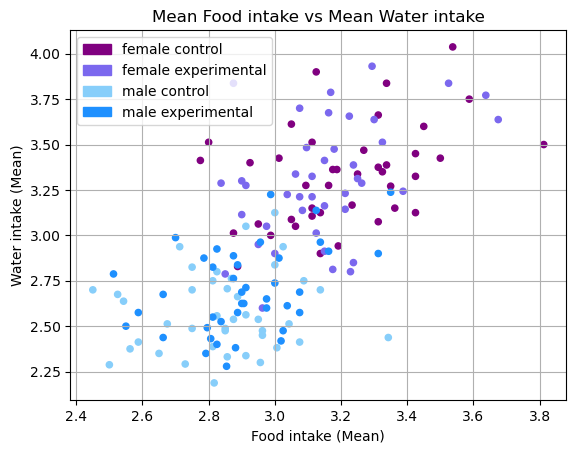

In [28]:
#Now I want the same graph but then with the four subgroups 
#Plot here will depict mean of all animals per day
#But that's not what I wanted, I want the mean per animal for all days
import matplotlib.patches as mpatches

def remove_outliers(df, column):
    values = []
    for idx, row in df.iterrows():
        if row[column] < 1 or row[column] > np.mean(df[column]) * 2:
            values.append(np.nan)
        else:
            values.append(row[column])
    return values

def remove_and_clean(df):
    """Removes unnecessary rows and cleans data to get rid of erroneous values.
    Args:
        df (Pandas dataframe): Contains data from niacin experiment
    Returns:
        Dataframe: Cleaned dataframe
    """
    df_cleaned = (
        df.query("food_yesterday != -1.0")
        .assign(food_intake=lambda df_: remove_outliers(df_, "food_intake"))
        .assign(water_intake=lambda df_: remove_outliers(df_, "water_intake"))
    )
    return df_cleaned

# Cleans the dataframe for food intake and water intake: removes the outliers using "remove_and_clean" and removes
# all of the -1 values
df_food_water = remove_and_clean(df)

# Calculate mean values per subgroup
mean_fw = df_food_water.groupby(["sex", "group", "date"]).mean(numeric_only=True).reset_index()

# Get color for each data point
colors = {"3": "dodgerblue", "2": "lightskyblue", "1": "mediumslateblue", "0": "purple"}
color_list = [colors[str(int(group))] for group in mean_fw['groupn']]

# Create a scatter plot with color-coding based on the four groups
ax = mean_fw.plot.scatter(x="food_intake", y="water_intake", c=color_list, grid=True)

# Create legend handles, labels for each group, and add legend to the plot
legend_handles = [
    mpatches.Patch(color=colors["0"], label="female control"),
    mpatches.Patch(color=colors["1"], label="female experimental"),
    mpatches.Patch(color=colors["2"], label="male control"),
    mpatches.Patch(color=colors["3"], label="male experimental")
]
ax.legend(handles=legend_handles, loc='upper left')

# Set labels for the axes and title
ax.set_xlabel("Food intake (Mean)")
ax.set_ylabel("Water intake (Mean)")
ax.set_title("Mean Food intake vs Mean Water intake")

#This shows the mean per day, not per animal apparently
unique_combinations = mean_fw[['sex', 'group', 'date']].drop_duplicates()
print(unique_combinations)

Text(0.5, 1.0, 'Mean Food intake vs Mean Water intake')

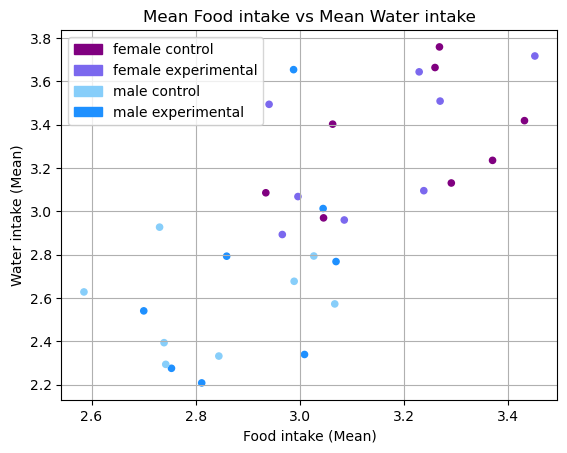

In [29]:
# So a new try for to get an overview of all animals: their mean food intake plotted against their mean water intake

#First the same stemps as in previous cells, cleaning the dataframe. 
def remove_outliers(df, column):
    values = []
    for idx, row in df.iterrows():
        if row[column] < 1 or row[column] > np.mean(df[column]) * 2:
            values.append(np.nan)
        else:
            values.append(row[column])
    return values

def remove_and_clean(df):
    """Removes unnecessary rows and cleans data to get rid of erroneous values.
    Args:
        df (Pandas dataframe): Contains data from niacin experiment
    Returns:
        Dataframe: Cleaned dataframe
    """
    df_cleaned = (
        df.query("food_yesterday != -1.0")
        .assign(food_intake=lambda df_: remove_outliers(df_, "food_intake"))
        .assign(water_intake=lambda df_: remove_outliers(df_, "water_intake"))
    )
    return df_cleaned

# Cleans the dataframe for food intake and water intake: removes the outliers using "remove_and_clean" and removes
# all of the -1 values
df_food_water = remove_and_clean(df)

#Get the mean of all values from the animals by animal_id
mean_fw = df_food_water.groupby(["animal_id"]).mean(numeric_only=True).reset_index()

# Get color for each data point
colors = {"3": "dodgerblue", "2": "lightskyblue", "1": "mediumslateblue", "0": "purple"}
color_list = [colors[str(int(group))] for group in mean_fw['groupn']]

# Create a scatter plot with color-coding based on the four groups
ax = mean_fw.plot.scatter(x="food_intake", y="water_intake", c=color_list, grid=True)

# Create legend handles, labels for each group, and add legend to the plot
legend_handles = [
    mpatches.Patch(color=colors["0"], label="female control"),
    mpatches.Patch(color=colors["1"], label="female experimental"),
    mpatches.Patch(color=colors["2"], label="male control"),
    mpatches.Patch(color=colors["3"], label="male experimental")
]
ax.legend(handles=legend_handles, loc='upper left')

# Set labels for the axes and title
ax.set_xlabel("Food intake (Mean)")
ax.set_ylabel("Water intake (Mean)")
ax.set_title("Mean Food intake vs Mean Water intake")

Text(0.5, 0.92, 'Mean Food intake vs Mean Water intake')

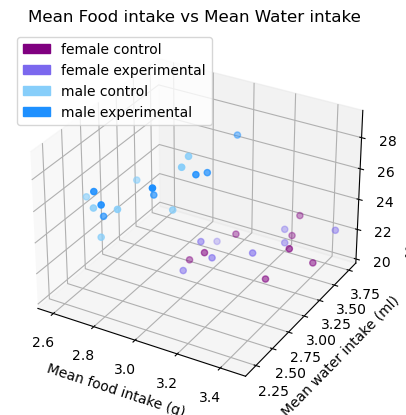

In [30]:
# try to do the same but in 3d: so add in the animal's weights

#First the same stemps as in previous cells, cleaning the dataframe. 
def remove_outliers(df, column):
    values = []
    for idx, row in df.iterrows():
        if row[column] < 1 or row[column] > np.mean(df[column]) * 2:
            values.append(np.nan)
        else:
            values.append(row[column])
    return values

def remove_and_clean(df):
    """Removes unnecessary rows and cleans data to get rid of erroneous values.
    Args:
        df (Pandas dataframe): Contains data from niacin experiment
    Returns:
        Dataframe: Cleaned dataframe
    """
    df_cleaned = (
        df.query("food_yesterday != -1.0")
        .assign(food_intake=lambda df_: remove_outliers(df_, "food_intake"))
        .assign(water_intake=lambda df_: remove_outliers(df_, "water_intake"))
    )
    return df_cleaned

# Cleans the dataframe for food intake and water intake: removes the outliers using "remove_and_clean" and removes
# all of the -1 values
df_food_water = remove_and_clean(df)

#Get the mean of all values from the animals by animal_id
mean_fw = df_food_water.groupby(["animal_id"]).mean(numeric_only=True).reset_index()

# Get color for each data point
colors = {"3": "dodgerblue", "2": "lightskyblue", "1": "mediumslateblue", "0": "purple"}
color_list = [colors[str(int(group))] for group in mean_fw['groupn']]

# Create a scatter plot with color-coding based on the four groups
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(mean_fw["food_intake"], mean_fw["water_intake"], mean_fw["bodyweight"], c=color_list)

# Create legend handles, labels for each group, and add legend to the plot
legend_handles = [
    mpatches.Patch(color=colors["0"], label="female control"),
    mpatches.Patch(color=colors["1"], label="female experimental"),
    mpatches.Patch(color=colors["2"], label="male control"),
    mpatches.Patch(color=colors["3"], label="male experimental")
]
ax.legend(handles=legend_handles, loc='upper left')

# Set labels for the axes and title
ax.set_xlabel("Mean food intake (g)")
ax.set_ylabel("Mean water intake (ml)")
ax.set_zlabel("Mean body weight (g)")
ax.set_title("Mean Food intake vs Mean Water intake")

**Displaying all individual's body weight and food and water intake**

Text(0.5, 1.0, 'Male control data')

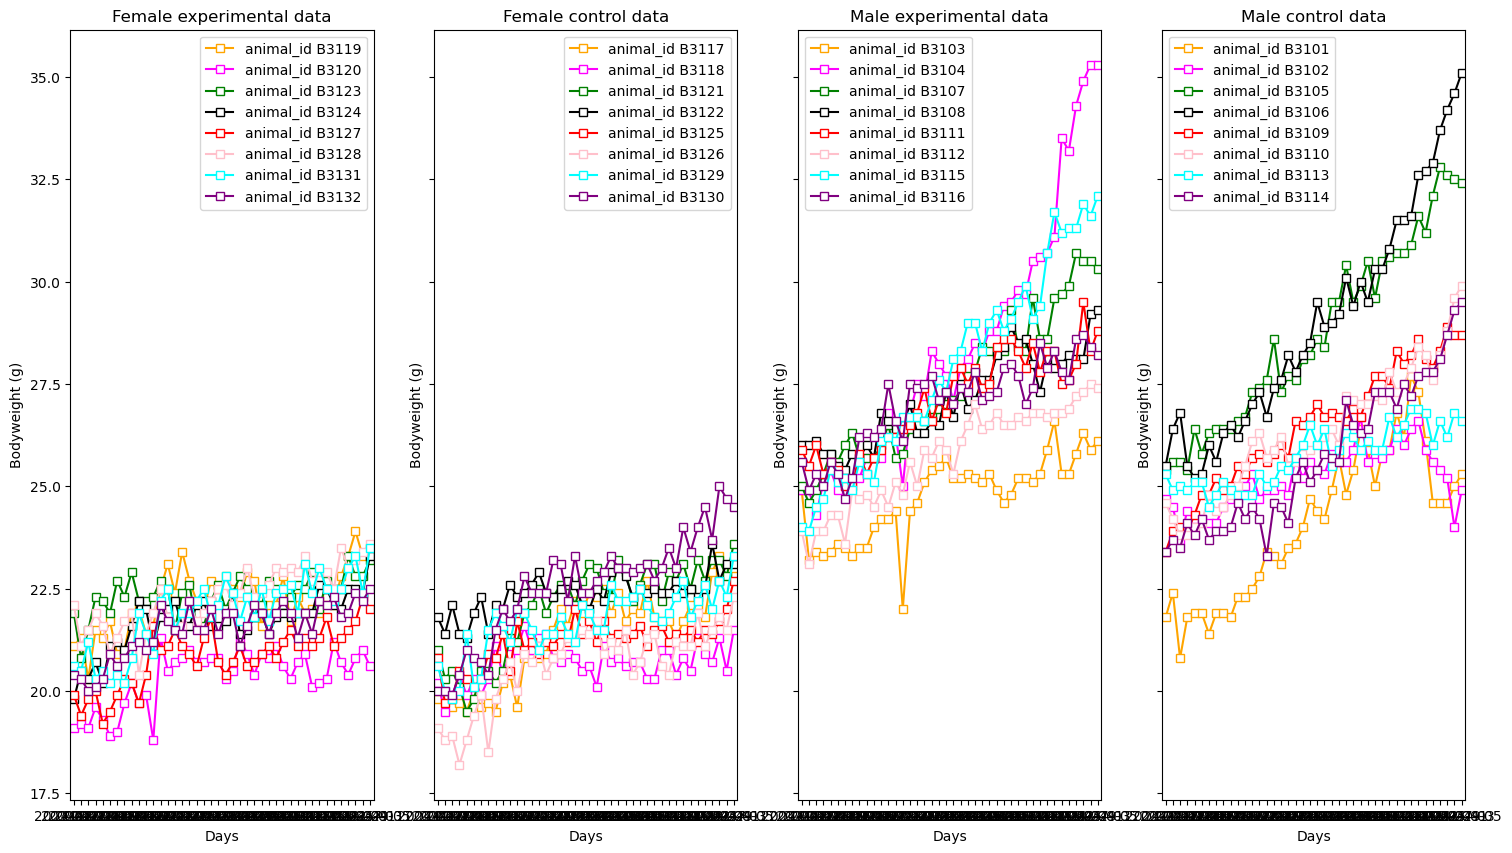

In [31]:
# Subset the DataFrames into four
female_experimental_data = df[(df['sex'] == 'female') & (df['group'] == 'experimental')]
female_control_data = df[(df["sex"] == "female") & (df["group"] == "control")]
male_experimental_data = df[(df["sex"] == "male") & (df["group"] == "experimental")]
male_control_data = df[(df["sex"] == "male") & (df["group"] == "control")]

# Set x values based on the number of days
x_values0 = np.arange(len(female_experimental_data['date'].unique()))
x_values1 = np.arange(len(female_control_data['date'].unique()))
x_values2 = np.arange(len(male_experimental_data['date'].unique()))
x_values3 = np.arange(len(male_control_data['date'].unique()))

# Create a subplot
fig, ax = plt.subplots(ncols=4, figsize=(18, 10), sharey=True,
                     gridspec_kw={"width_ratios": [1, 1, 1, 1]})

# Get unique samples in the dataset
samples0 = female_experimental_data['animal_id'].unique()
samples1 = female_control_data["animal_id"].unique()
samples2 = male_experimental_data["animal_id"].unique()
samples3 = male_control_data["animal_id"].unique()

# Colour of lines
palette = ["orange", "magenta", "green", "black", "red", "pink", "cyan", "purple"]

# Loop through each sample and plot the connected data points
for i, sample in enumerate(samples0):
    sample_data = female_experimental_data[female_experimental_data['animal_id'] == sample]
    ax[0].plot(x_values0,
               sample_data['bodyweight'],
               marker='s', linestyle='-',
               markerfacecolor="white",
               color=palette[i % len(palette)],  # Use the color from the palette based on the index
               label=f"animal_id {sample}")

for i, sample in enumerate(samples1):
    sample_data = female_control_data[female_control_data['animal_id'] == sample]
    ax[1].plot(x_values1,
               sample_data['bodyweight'],
               marker='s', linestyle='-',
               markerfacecolor="white",
               color=palette[i % len(palette)],
               label=f"animal_id {sample}")

for i, sample in enumerate(samples2):
    sample_data = male_experimental_data[male_experimental_data['animal_id'] == sample]
    ax[2].plot(x_values2,
               sample_data['bodyweight'],
               marker='s', linestyle='-',
               markerfacecolor="white",
               color=palette[i % len(palette)],
               label=f"animal_id {sample}")

for i, sample in enumerate(samples3):
    sample_data = male_control_data[male_control_data['animal_id'] == sample]
    ax[3].plot(x_values3,
               sample_data['bodyweight'],
               marker='s', linestyle='-',
               markerfacecolor="white",
               color=palette[i % len(palette)],
               label=f"animal_id {sample}")

# Set x axis limits and ticks
for i in range(4):
    ax[i].set_xlim([-0.5, len(eval(f'x_values{i}')) - 0.5])
    ax[i].set_xticks(np.arange(len(eval(f'x_values{i}'))))
    ax[i].set_xticklabels(sorted(eval(f'df[df["group"]=="experimental"]["date"].unique()')))

    # Add labels
    ax[i].set_ylabel("Bodyweight (g)")
    ax[i].set_xlabel("Days")
    ax[i].legend()

ax[0].set_title(f"Female experimental data")
ax[1].set_title(f"Female control data")
ax[2].set_title(f"Male experimental data")
ax[3].set_title(f"Male control data")

Text(0.5, 1.0, 'Male control data')

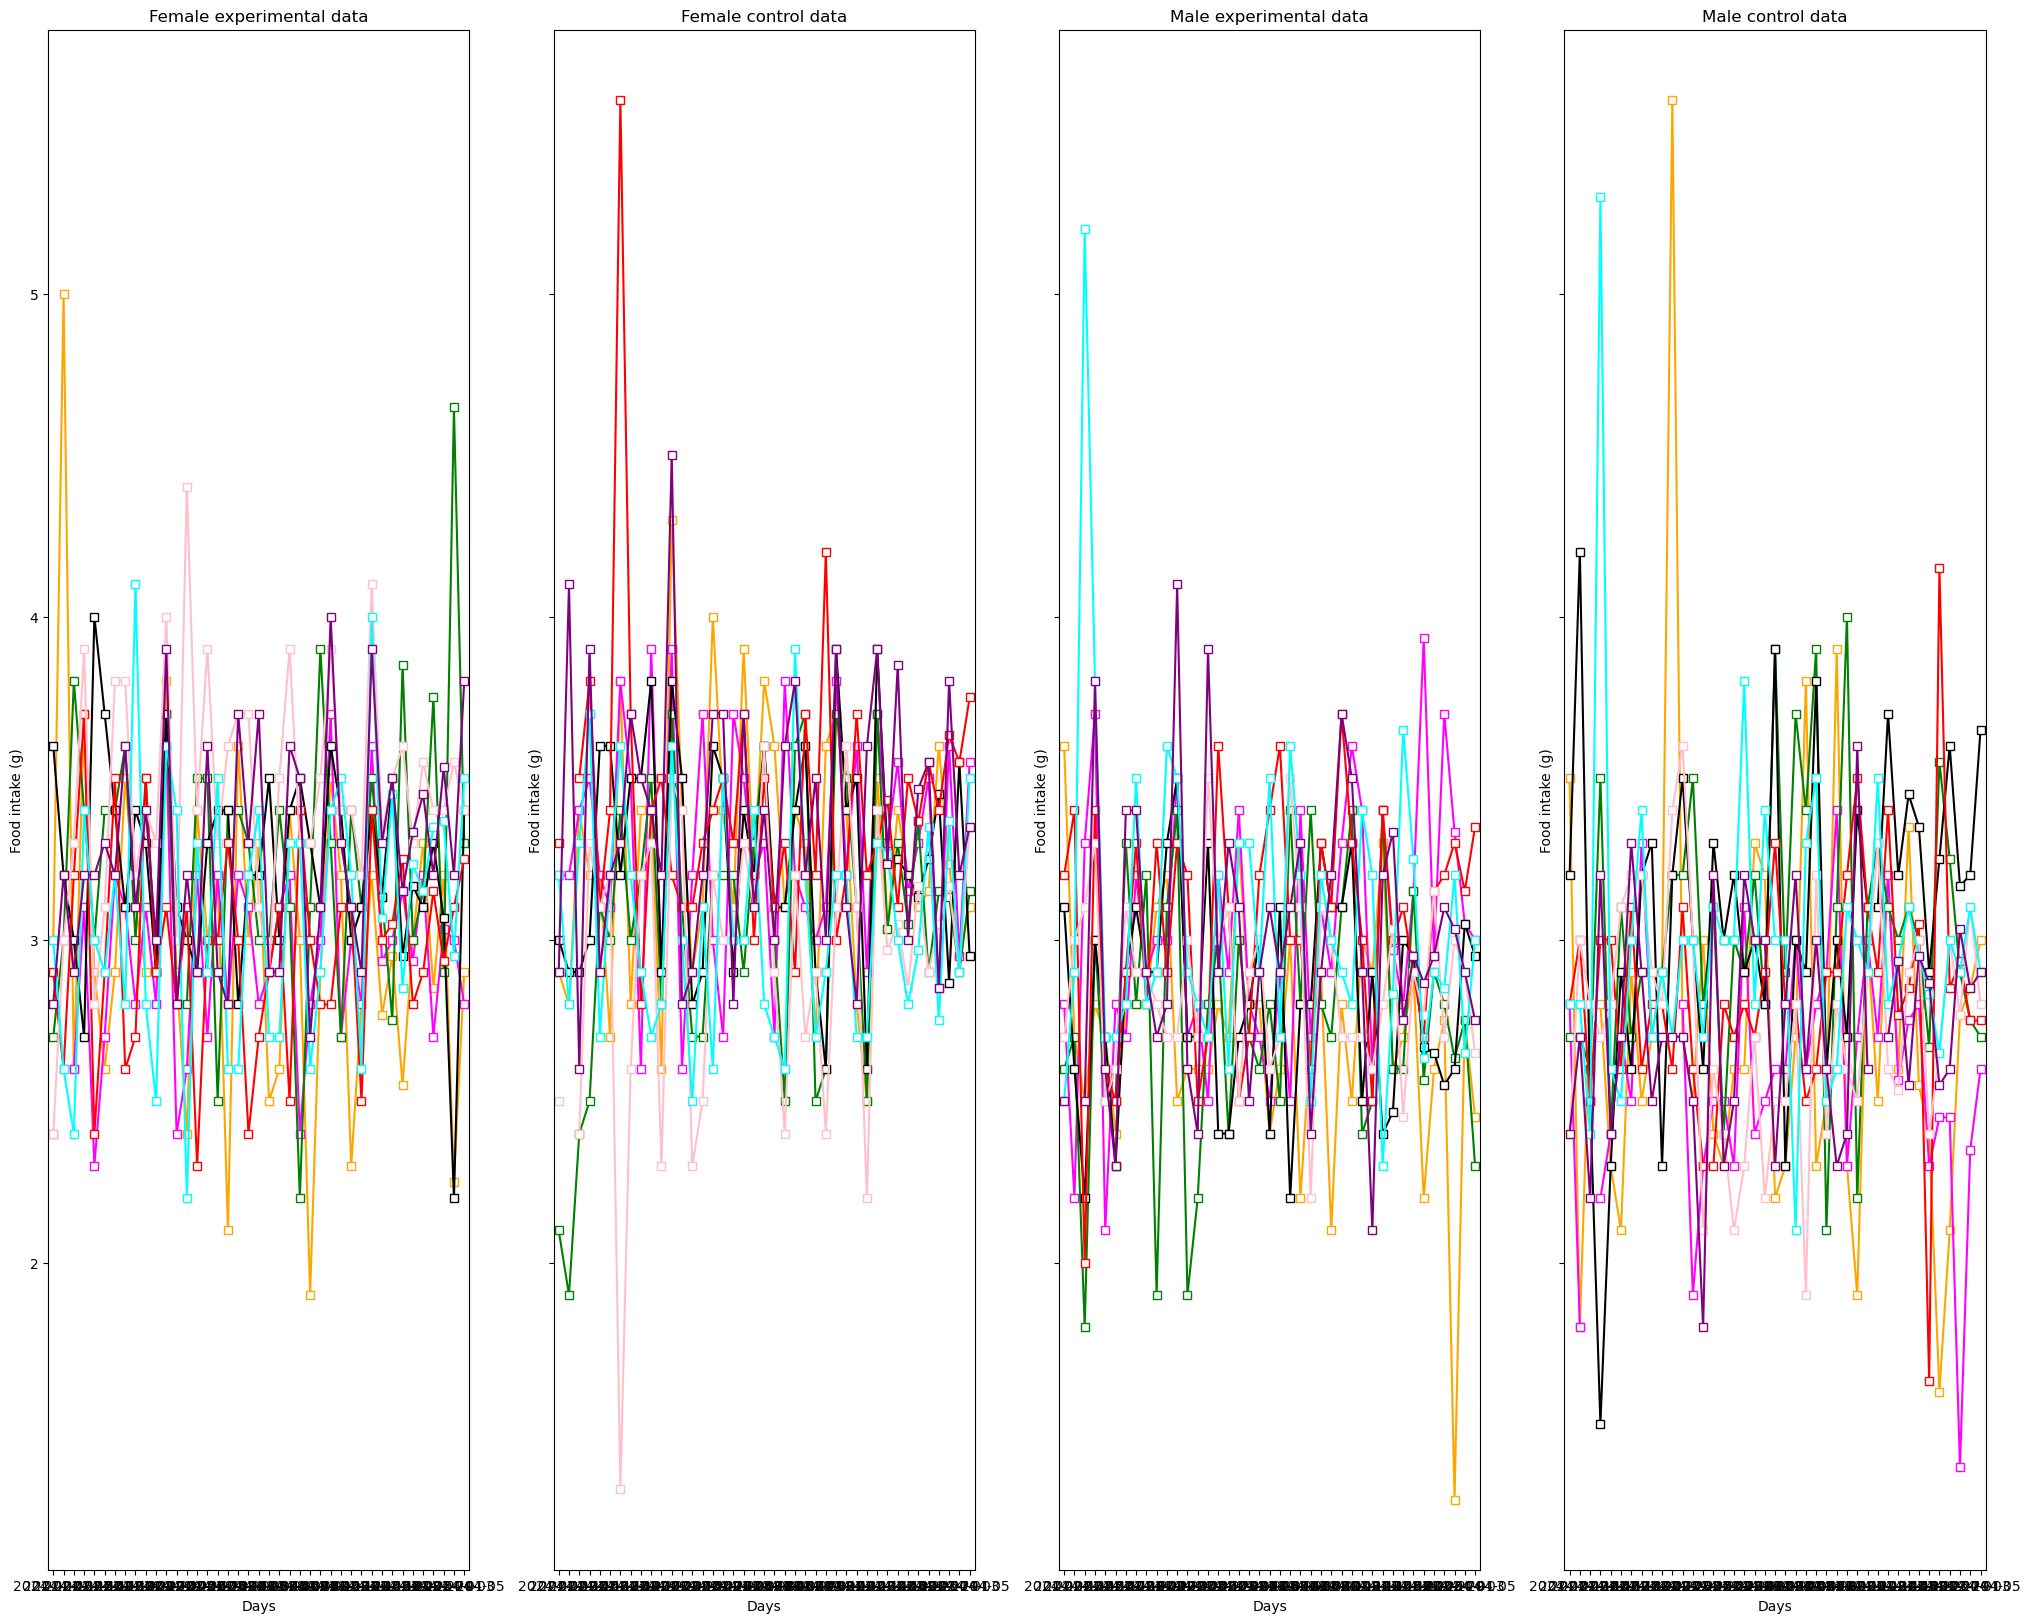

In [32]:
#do the same for food intake
#cleaning dataframe
def remove_outliers(df, column):
    values = []
    for idx, row in df.iterrows():
        if row[column] < 1 or row[column] > np.mean(df[column]) * 2:
            values.append(np.nan)
        else:
            values.append(row[column])
    return values

def remove_and_clean(df):
    """Removes unnecessary rows and cleans data to get rid of erroneous values.
    Args:
        df (Pandas dataframe): Contains data from niacin experiment
    Returns:
        Dataframe: Cleaned dataframe
    """
    df_cleaned = (
        df.query("food_yesterday != -1.0")
        .assign(food_intake=lambda df_: remove_outliers(df_, "food_intake"))
        .assign(water_intake=lambda df_: remove_outliers(df_, "water_intake"))
    )
    return df_cleaned

# Cleans the dataframe for food intake and water intake: removes the outliers using "remove_and_clean" and removes
# all of the -1 values
df_food_water = remove_and_clean(df)

# Subset the DataFrames into four
female_experimental_data = df_food_water[(df_food_water['sex'] == 'female') & (df_food_water['group'] == 'experimental')]
female_control_data = df_food_water[(df_food_water["sex"] == "female") & (df_food_water["group"] == "control")]
male_experimental_data = df_food_water[(df_food_water["sex"] == "male") & (df_food_water["group"] == "experimental")]
male_control_data = df_food_water[(df_food_water["sex"] == "male") & (df_food_water["group"] == "control")]

# Set x values based on the number of days
x_values0 = np.arange(len(female_experimental_data['date'].unique()))
x_values1 = np.arange(len(female_control_data['date'].unique()))
x_values2 = np.arange(len(male_experimental_data['date'].unique()))
x_values3 = np.arange(len(male_control_data['date'].unique()))

# Create a subplot
fig, ax = plt.subplots(ncols=4, figsize=(25, 20), sharey=True,
                     gridspec_kw={"width_ratios": [1, 1, 1, 1]})

# Get unique samples in the dataset
samples0 = female_experimental_data['animal_id'].unique()
samples1 = female_control_data["animal_id"].unique()
samples2 = male_experimental_data["animal_id"].unique()
samples3 = male_control_data["animal_id"].unique()

# Colour of lines
palette = ["orange", "magenta", "green", "black", "red", "pink", "cyan", "purple"]

# Loop through each sample and plot the connected data points
for i, sample in enumerate(samples0):
    sample_data = female_experimental_data[female_experimental_data['animal_id'] == sample]
    ax[0].plot(x_values0,
               sample_data['food_intake'],
               marker='s', linestyle='-',
               markerfacecolor="white",
               color=palette[i % len(palette)],  # Use the color from the palette based on the index
               label=f"animal_id {sample}")

for i, sample in enumerate(samples1):
    sample_data = female_control_data[female_control_data['animal_id'] == sample]
    ax[1].plot(x_values1,
               sample_data['food_intake'],
               marker='s', linestyle='-',
               markerfacecolor="white",
               color=palette[i % len(palette)],
               label=f"animal_id {sample}")

for i, sample in enumerate(samples2):
    sample_data = male_experimental_data[male_experimental_data['animal_id'] == sample]
    ax[2].plot(x_values2,
               sample_data['food_intake'],
               marker='s', linestyle='-',
               markerfacecolor="white",
               color=palette[i % len(palette)],
               label=f"animal_id {sample}")

for i, sample in enumerate(samples3):
    sample_data = male_control_data[male_control_data['animal_id'] == sample]
    ax[3].plot(x_values3,
               sample_data['food_intake'],
               marker='s', linestyle='-',
               markerfacecolor="white",
               color=palette[i % len(palette)],
               label=f"animal_id {sample}")

# Set x axis limits and ticks
for i in range(4):
    ax[i].set_xlim([-0.5, len(eval(f'x_values{i}')) - 0.5])
    ax[i].set_xticks(np.arange(len(eval(f'x_values{i}'))))
    ax[i].set_xticklabels(sorted(eval(f'df_food_water[df_food_water["group"]=="experimental"]["date"].unique()')))

    # Add labels
    ax[i].set_ylabel("Food intake (g)")
    ax[i].set_xlabel("Days")

ax[0].set_title(f"Female experimental data")
ax[1].set_title(f"Female control data")
ax[2].set_title(f"Male experimental data")
ax[3].set_title(f"Male control data")


Text(0.5, 1.0, 'Male control data')

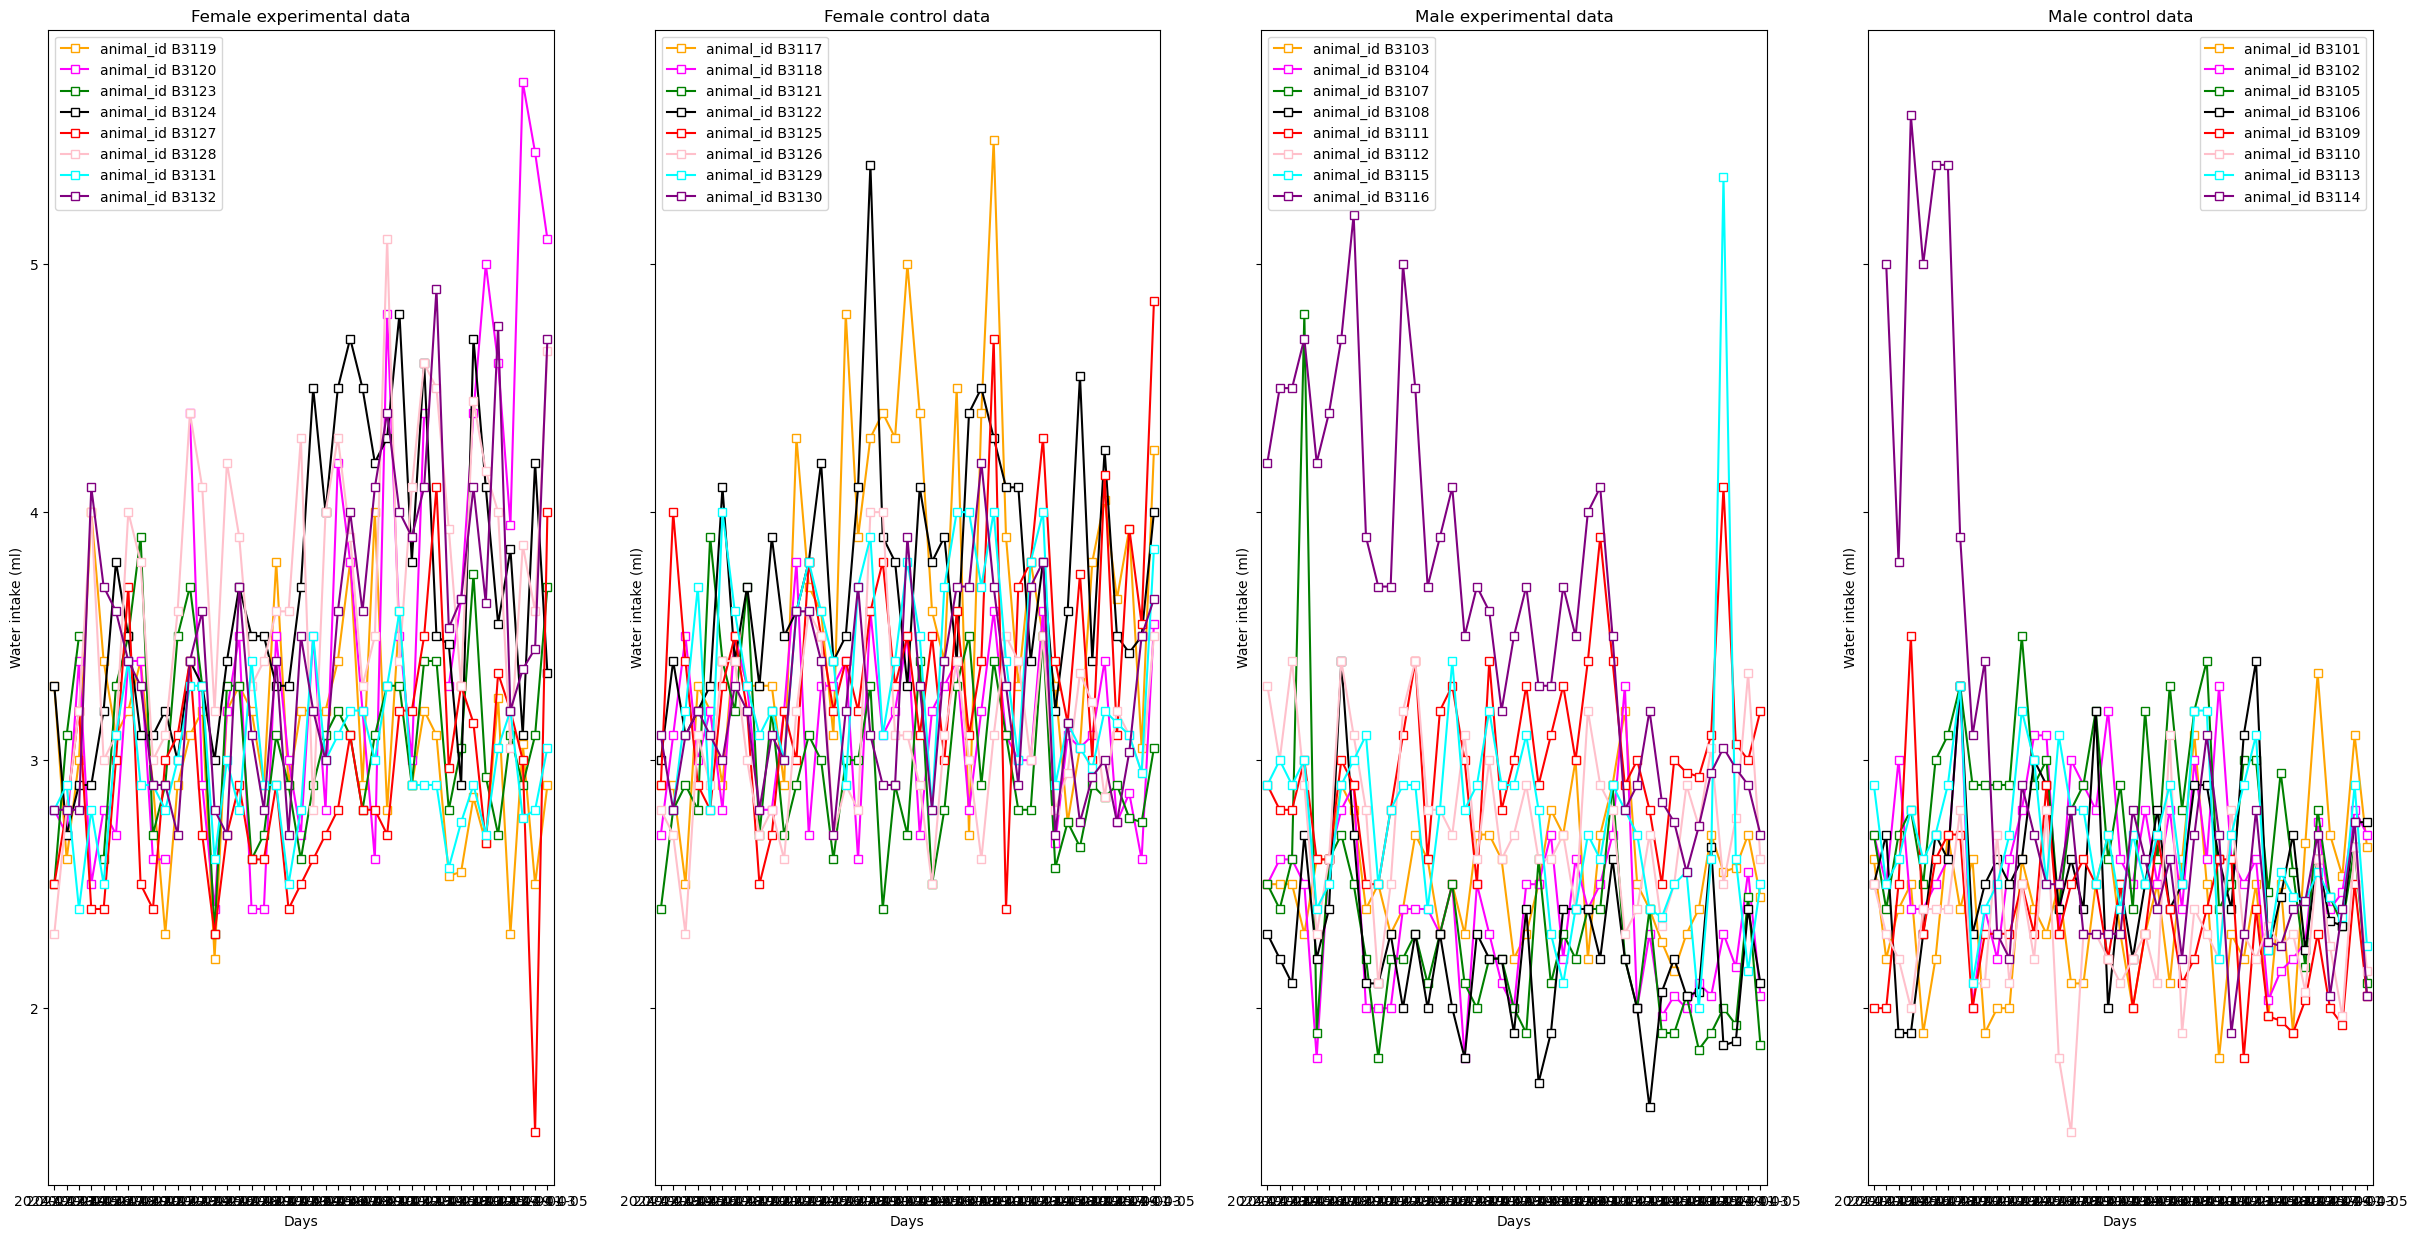

In [33]:
#do the same for water intake
#cleaning dataframe
def remove_outliers(df, column):
    values = []
    for idx, row in df.iterrows():
        if row[column] < 1 or row[column] > np.mean(df[column]) * 2:
            values.append(np.nan)
        else:
            values.append(row[column])
    return values

def remove_and_clean(df):
    """Removes unnecessary rows and cleans data to get rid of erroneous values.
    Args:
        df (Pandas dataframe): Contains data from niacin experiment
    Returns:
        Dataframe: Cleaned dataframe
    """
    df_cleaned = (
        df.query("food_yesterday != -1.0")
        .assign(food_intake=lambda df_: remove_outliers(df_, "food_intake"))
        .assign(water_intake=lambda df_: remove_outliers(df_, "water_intake"))
    )
    return df_cleaned

# Cleans the dataframe for food intake and water intake: removes the outliers using "remove_and_clean" and removes
# all of the -1 values
df_food_water = remove_and_clean(df)

# Subset the DataFrames into four
female_experimental_data = df_food_water[(df_food_water['sex'] == 'female') & (df_food_water['group'] == 'experimental')]
female_control_data = df_food_water[(df_food_water["sex"] == "female") & (df_food_water["group"] == "control")]
male_experimental_data = df_food_water[(df_food_water["sex"] == "male") & (df_food_water["group"] == "experimental")]
male_control_data = df_food_water[(df_food_water["sex"] == "male") & (df_food_water["group"] == "control")]

# Set x values based on the number of days
x_values0 = np.arange(len(female_experimental_data['date'].unique()))
x_values1 = np.arange(len(female_control_data['date'].unique()))
x_values2 = np.arange(len(male_experimental_data['date'].unique()))
x_values3 = np.arange(len(male_control_data['date'].unique()))

# Create a subplot
fig, ax = plt.subplots(ncols=4, figsize=(30, 15), sharey=True,
                     gridspec_kw={"width_ratios": [1, 1, 1, 1]})

# Get unique samples in the dataset
samples0 = female_experimental_data['animal_id'].unique()
samples1 = female_control_data["animal_id"].unique()
samples2 = male_experimental_data["animal_id"].unique()
samples3 = male_control_data["animal_id"].unique()

# Colour of lines
palette = ["orange", "magenta", "green", "black", "red", "pink", "cyan", "purple"]

# Loop through each sample and plot the connected data points
for i, sample in enumerate(samples0):
    sample_data = female_experimental_data[female_experimental_data['animal_id'] == sample]
    ax[0].plot(x_values0,
               sample_data['water_intake'],
               marker='s', linestyle='-',
               markerfacecolor="white",
               color=palette[i % len(palette)],  # Use the color from the palette based on the index
               label=f"animal_id {sample}")

for i, sample in enumerate(samples1):
    sample_data = female_control_data[female_control_data['animal_id'] == sample]
    ax[1].plot(x_values1,
               sample_data['water_intake'],
               marker='s', linestyle='-',
               markerfacecolor="white",
               color=palette[i % len(palette)],
               label=f"animal_id {sample}")

for i, sample in enumerate(samples2):
    sample_data = male_experimental_data[male_experimental_data['animal_id'] == sample]
    ax[2].plot(x_values2,
               sample_data['water_intake'],
               marker='s', linestyle='-',
               markerfacecolor="white",
               color=palette[i % len(palette)],
               label=f"animal_id {sample}")

for i, sample in enumerate(samples3):
    sample_data = male_control_data[male_control_data['animal_id'] == sample]
    ax[3].plot(x_values3,
               sample_data['water_intake'],
               marker='s', linestyle='-',
               markerfacecolor="white",
               color=palette[i % len(palette)],
               label=f"animal_id {sample}")

# Set x axis limits and ticks
for i in range(4):
    ax[i].set_xlim([-0.5, len(eval(f'x_values{i}')) - 0.5])
    ax[i].set_xticks(np.arange(len(eval(f'x_values{i}'))))
    ax[i].set_xticklabels(sorted(eval(f'df_food_water[df_food_water["group"]=="experimental"]["date"].unique()')))

    # Add labels
    ax[i].set_ylabel("Water intake (ml)")
    ax[i].set_xlabel("Days")
    ax[i].legend()
    
ax[0].set_title(f"Female experimental data")
ax[1].set_title(f"Female control data")
ax[2].set_title(f"Male experimental data")
ax[3].set_title(f"Male control data")

In [34]:
df.columns

Index(['animal_id', 'sex', 'group', 'diet', 'date', 'niacin', 'bodyweight',
       'food_yesterday', 'food_today', 'food_intake', 'water_yesterday',
       'water_today', 'water_intake', 'groupn'],
      dtype='object')

# Pooling male and female data together

body weight

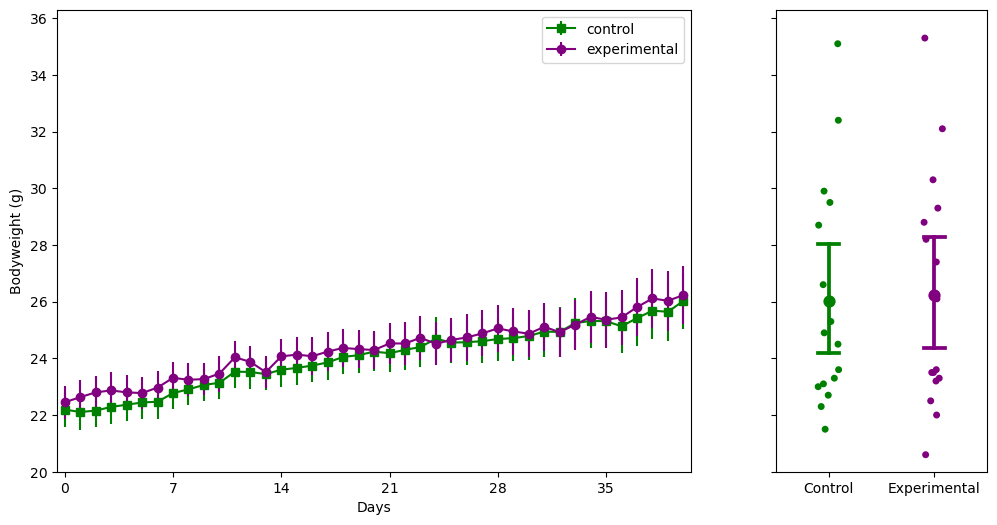

In [35]:
# Find mean and SEM
mean = df_food_water.groupby(["group", "date"]).mean(numeric_only=True).reset_index()
sem = df_food_water.groupby(["group", "date"]).sem(numeric_only=True).reset_index()

# Generate figure with two subplots
f, ax = plt.subplots(ncols=2, figsize=(12, 6), sharey=True,
                     gridspec_kw={"width_ratios": [3, 1]},)

# Set x values based on number of days
x_control = np.arange(len(mean.query("group == 'control'")))
x_experimental = np.arange(len(mean.query("group == 'experimental'")))

# Plot data for each group in first subplot
ax[0].errorbar(x_control,
               mean.query("group == 'control'").bodyweight,
               yerr=sem.query("group == 'control'").bodyweight,
               marker="s", markerfacecolor="green", color="green",
               label="control"
               )

ax[0].errorbar(x_experimental,
               mean.query("group == 'experimental'").bodyweight,
               yerr=sem.query("group == 'experimental'").bodyweight,
               marker="o", markerfacecolor="purple", color="purple",
               label="experimental"
               )

# Set limits and ticks
ax[0].set_xlim([-0.5, max(len(mean.query("group == 'control'")), len(mean.query("group == 'experimental'"))) - 0.5])
ax[0].set_xticks(np.arange(0, max(len(mean.query("group == 'control'")), len(mean.query("group == 'experimental'"))), 7))
ax[0].set_xlabel("Days")

# Add labels
ax[0].set_ylabel("Bodyweight (g)")
ax[0].legend()

# Plot today's data in second subplot
today = df.date.max()
today_df = df.query("date == @today").copy() #I was given a warning so this line should be there to prevent it?

palette = {"control": "green", "experimental": "purple"}

# again this line is to prevent a warning
today_df.loc[:, "group_index"] = today_df.groupby("group").ngroup()

sns.stripplot(data=today_df, x="group_index", y="bodyweight", hue="group", palette=palette, ax=ax[1])
sns.pointplot(data=today_df, x="group_index", y="bodyweight", hue="group", capsize=.2, palette=palette, markers='o', join=False, ax=ax[1])
ax[0].set_ylim([20, df['bodyweight'].max() + 1])

ax[1].set_xticks([0, 1])
ax[1].set_xticklabels(["Control", "Experimental"]) 
ax[1].set_xlabel("")
ax[1].set_ylabel("Bodyweight (g)")
ax[1].legend().remove()


food intake

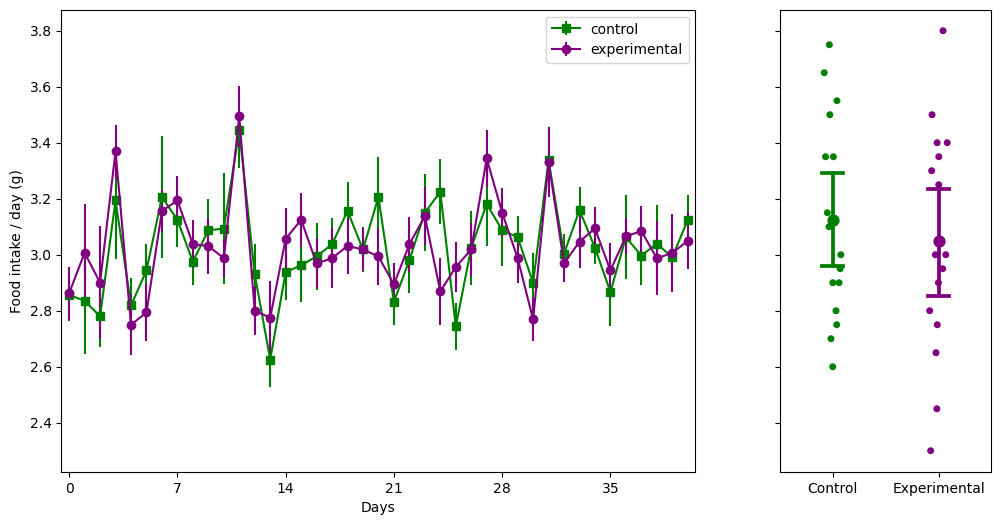

In [36]:
# Find mean and SEM
mean = df_food_water.groupby(["group", "date"]).mean(numeric_only=True).reset_index()
sem = df_food_water.groupby(["group", "date"]).sem(numeric_only=True).reset_index()

# Generate figure with two subplots
f, ax = plt.subplots(ncols=2, figsize=(12, 6), sharey=True,
                     gridspec_kw={"width_ratios": [3, 1]},)

# Set x values based on number of days
x_control = np.arange(len(mean.query("group == 'control'")))
x_experimental = np.arange(len(mean.query("group == 'experimental'")))

# Plot data for each group in first subplot
ax[0].errorbar(x_control,
               mean.query("group == 'control'").food_intake,
               yerr=sem.query("group == 'control'").food_intake,
               marker="s", markerfacecolor="green", color="green",
               label="control"
               )

ax[0].errorbar(x_experimental,
               mean.query("group == 'experimental'").food_intake,
               yerr=sem.query("group == 'experimental'").food_intake,
               marker="o", markerfacecolor="purple", color="purple",
               label="experimental"
               )

# Set limits and ticks
ax[0].set_xlim([-0.5, max(len(mean.query("group == 'control'")), len(mean.query("group == 'experimental'"))) - 0.5])
ax[0].set_xticks(np.arange(0, max(len(mean.query("group == 'control'")), len(mean.query("group == 'experimental'"))), 7))
ax[0].set_xlabel("Days")

# Add labels
ax[0].set_ylabel("Food intake / day (g)")
ax[0].legend()

# Plot today's data in second subplot
today = df.date.max()
today_df = df.query("date == @today").copy() #I was given a warning so this line should be there to prevent it?

palette = {"control": "green", "experimental": "purple"}

# again this line is to prevent a warning
today_df.loc[:, "group_index"] = today_df.groupby("group").ngroup()

sns.stripplot(data=today_df, x="group_index", y="food_intake", hue="group", palette=palette, ax=ax[1])
sns.pointplot(data=today_df, x="group_index", y="food_intake", hue="group", capsize=.2, palette=palette, markers='o', join=False, ax=ax[1])

ax[1].set_xticks([0, 1])
ax[1].set_xticklabels(["Control", "Experimental"]) 
ax[1].set_xlabel("")
ax[1].set_ylabel("Food intake / day (g)")
ax[1].legend().remove()


Water intake

# Graphs after split

In [37]:
## trying to do this but then the groups split later

## first creating the new groups
def get_value(row):
    if row['sex'] == 'female' and row['group'] == 'control':
        return 0
    elif row['sex'] == 'female' and row['group'] == 'experimental' and row['niacin'] == 1.0:
        return 1
    elif row['sex'] == 'female' and row['group'] == 'experimental' and row['niacin'] == 5.0:
        return 2
    elif row['sex'] == 'female' and row['group'] == 'experimental' and row['niacin'] == 0.0:
        return 3
    elif row['sex'] == 'male' and row['group'] == 'control':
        return 4
    elif row['sex'] == 'male' and row['group'] == 'experimental' and row['niacin'] == 1.0:
        return 5
    elif row['sex'] == 'male' and row['group'] == 'experimental' and row['niacin'] == 0.0:
        return 6
    elif row['sex'] == 'male' and row['group'] == 'experimental' and row['niacin'] == 5.0:
        return 7
    else:
        return -1

def tweak_df(df):
    
    return (df
            # .query("bodyweight != ''")
            .query("bodyweight.notna()", engine="python")
            .astype({"sex": "category",
                     "group": "category",
                     "diet": "category",
                     "bodyweight": float,
                     "food_yesterday": float,
                     "food_intake": float,
                     "water_intake": float
                     }
                    )
             .assign(groupn = lambda df_: df_.apply(get_value, axis=1))
            )
    
df_split = tweak_df(pd.DataFrame(rows, columns=header)) #stored in a different df to not mess up the rest 

In [54]:
df_split.head()

,animal_id,sex,group,diet,date,niacin,bodyweight,food_yesterday,food_today,food_intake,water_yesterday,water_today,water_intake,groupn
0,B3101,male,control,control,2024-02-12,0.0,21.8,-1.0,60.7,-1.0,-1.0,50.9,-1.0,4
1,B3102,male,control,control,2024-02-12,0.0,24.7,-1.0,56,-1.0,-1.0,50.4,-1.0,4
2,B3103,male,experimental,control,2024-02-12,0.0,24.9,-1.0,54.5,-1.0,-1.0,50.5,-1.0,6
3,B3104,male,experimental,control,2024-02-12,0.0,24.9,-1.0,54.5,-1.0,-1.0,50.5,-1.0,6
4,B3105,male,control,control,2024-02-12,0.0,25.4,-1.0,56.3,-1.0,-1.0,50.9,-1.0,4


In [60]:
df_end = df_split.tail(288)
df_end

,animal_id,sex,group,diet,date,niacin,bodyweight,food_yesterday,food_today,food_intake,water_yesterday,water_today,water_intake,groupn
1056,B3101,male,control,control,2024-03-18,0.0,26.2,37.4,29.6,2.600000,51.0,45.1,1.966667,4
1057,B3102,male,control,control,2024-03-18,0.0,26.0,37.7,30,2.566667,51.2,45.1,2.033333,4
1058,B3103,male,experimental,experimental,2024-03-18,0.0,25.3,64.8,57,2.600000,46.7,39.9,2.266667,6
1059,B3104,male,experimental,experimental,2024-03-18,0.0,30.6,52.1,43.2,2.966667,47.8,41.9,1.966667,6
1060,B3105,male,control,control,2024-03-18,0.0,30.7,56.1,47.1,3.000000,51.2,43.8,2.466667,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339,B3128,female,experimental,experimental,2024-04-05,0.0,23.6,41.3,34.5,3.400000,44.7,35.4,4.650000,3
1340,B3129,female,control,control,2024-04-05,0.0,23.3,39.2,32.2,3.500000,46.4,38.7,3.850000,0
1341,B3130,female,control,control,2024-04-05,0.0,24.5,40.7,34,3.350000,44.2,36.9,3.650000,0
1342,B3131,female,experimental,experimental,2024-04-05,0.0,23.5,38.3,31.3,3.500000,44.2,38.1,3.050000,3


IndexError: Boolean index has wrong length: 3 instead of 36

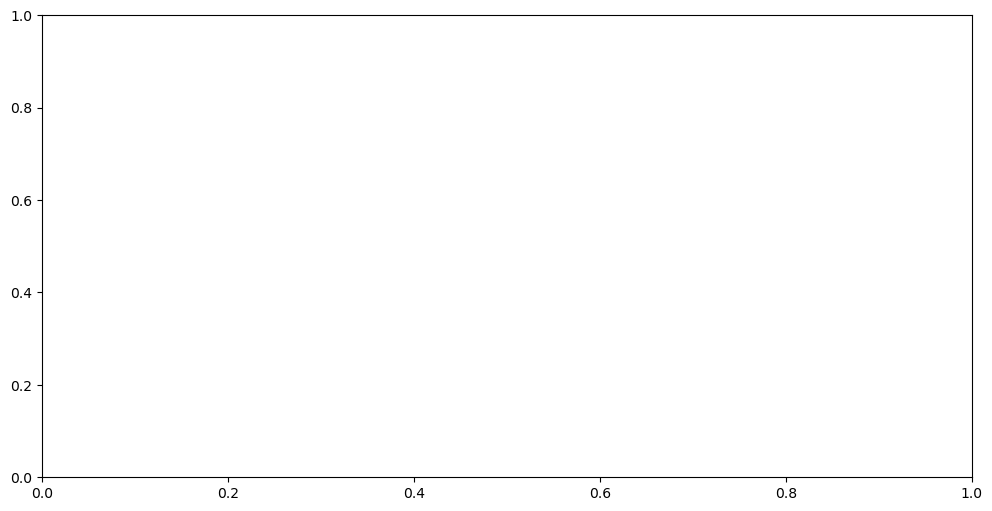

In [69]:

# Find mean and SEM of all data
mean_fw = df_end.groupby(["groupn", "date"]).mean(numeric_only=True).reset_index()
sem_fw = df_end.groupby(["groupn", "date"]).sem(numeric_only=True).reset_index()

# Generate figure with two subplots
f, ax = plt.subplots(figsize=(12, 6))

# Set x values based on number of days
x = [34,36,38,41,43,45,48,50] 
y = mean_fw.query("groupn == '0'").food_intake ## it says that y has 0 values, but how???????????????????????????

# Plot data for each group in first subplot
ax.errorbar(x,
            mean_fw.query("groupn == '0'").food_intake,
            yerr=sem_fw.query("groupn == '0'").food_intake,
            marker="s", markerfacecolor="white", color="red",
            label="female, control"
           )
ax.errorbar(x,
            mean_fw.query("groupn == '1'").food_intake,
            yerr=sem_fw.query("groupn == '1'").food_intake,
            marker="s", markerfacecolor="white", color="red",
            label="female, niacin 1.0"
           )
ax.errorbar(x,
            mean_fw.query("groupn == '2'").food_intake,
            yerr=sem_fw.query("groupn == '2'").food_intake,
            marker="s", markerfacecolor="white", color="red",
            label="female, niacin 5.0"
           )
ax.errorbar(x,
            mean_fw.query("groupn == '3'").food_intake,
            yerr=sem_fw.query("groupn == '3'").food_intake,
            marker="s", markerfacecolor="white", color="red",
            label="female, niacin 0.0"
           )
ax.errorbar(x,
            mean_fw.query("groupn == '4'").food_intake,
            yerr=sem_fw.query("groupn == '4'").food_intake,
            marker="s", markerfacecolor="white", color="red",
            label="male, control"
           )
ax.errorbar(x,
            mean_fw.query("groupn == '5'").food_intake,
            yerr=sem_fw.query("groupn == '5'").food_intake,
            marker="s", markerfacecolor="white", color="red",
            label="male, niacin 1.0"
           )
ax.errorbar(x,
            mean_fw.query("groupn == '6'").food_intake,
            yerr=sem_fw.query("groupn == '6'").food_intake,
            marker="s", markerfacecolor="white", color="red",
            label="female, niacin 0.0"
           )
ax.errorbar(x,
            mean_fw.query("groupn == '7'").food_intake,
            yerr=sem_fw.query("groupn == '7'").food_intake,
            marker="s", markerfacecolor="white", color="red",
            label="female, niacin 5.0"
           )

# Set x axis limits and ticks
ax.set_xlim([33.5,52.5])
ax.set_xticks([])

ax.set_ylim([0,4.5])

# Add labels
ax.set_ylabel("Food intake (g)")
ax.set_xlabel("Days")
ax.legend()
